Question 3 and 4:

In [71]:
from scipy.io import arff
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz 
import math
from sklearn.preprocessing import LabelEncoder


x_train = pd.read_csv('datatraining.txt', sep = ',')
y_train = x_train['Occupancy']

x_train['day'] = pd.to_datetime(x_train['date']).dt.day
x_train['month'] = pd.to_datetime(x_train['date']).dt.month
x_train['year'] = pd.to_datetime(x_train['date']).dt.year
x_train['hour'] = pd.to_datetime(x_train['date']).dt.hour
x_train['min'] = pd.to_datetime(x_train['date']).dt.minute
x_train['seconds'] = pd.to_datetime(x_train['date']).dt.second

x_train  = x_train.drop(columns=['Occupancy','date'])

x_test1 = pd.read_csv('datatest.txt',sep = ',')
y_test1 = x_test1['Occupancy']

x_test1['day'] = pd.to_datetime(x_test1['date']).dt.day
x_test1['month'] = pd.to_datetime(x_test1['date']).dt.month
x_test1['year'] = pd.to_datetime(x_test1['date']).dt.year
x_test1['hour'] = pd.to_datetime(x_test1['date']).dt.hour
x_test1['min'] = pd.to_datetime(x_test1['date']).dt.minute
x_test1['seconds'] = pd.to_datetime(x_test1['date']).dt.second


x_test1  = x_test1.drop(columns=['Occupancy','date'])

x_test2 = pd.read_csv('datatest2.txt',sep = ',')
y_test2 = x_test2['Occupancy']

x_test2['day'] = pd.to_datetime(x_test2['date']).dt.day
x_test2['month'] = pd.to_datetime(x_test2['date']).dt.month
x_test2['year'] = pd.to_datetime(x_test2['date']).dt.year
x_test2['hour'] = pd.to_datetime(x_test2['date']).dt.hour
x_test2['min'] = pd.to_datetime(x_test2['date']).dt.minute
x_test2['seconds'] = pd.to_datetime(x_test2['date']).dt.second


x_test2  = x_test2.drop(columns=['Occupancy','date'])

headers = list(x_train.columns.values)

# target_class = target.unique()
x_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,day,month,year,hour,min,seconds
1,23.18,27.2720,426.0,721.25,0.004793,4,2,2015,17,51,0
2,23.15,27.2675,429.5,714.00,0.004783,4,2,2015,17,51,59
3,23.15,27.2450,426.0,713.50,0.004779,4,2,2015,17,53,0
4,23.15,27.2000,426.0,708.25,0.004772,4,2,2015,17,54,0
5,23.10,27.2000,426.0,704.50,0.004757,4,2,2015,17,55,0


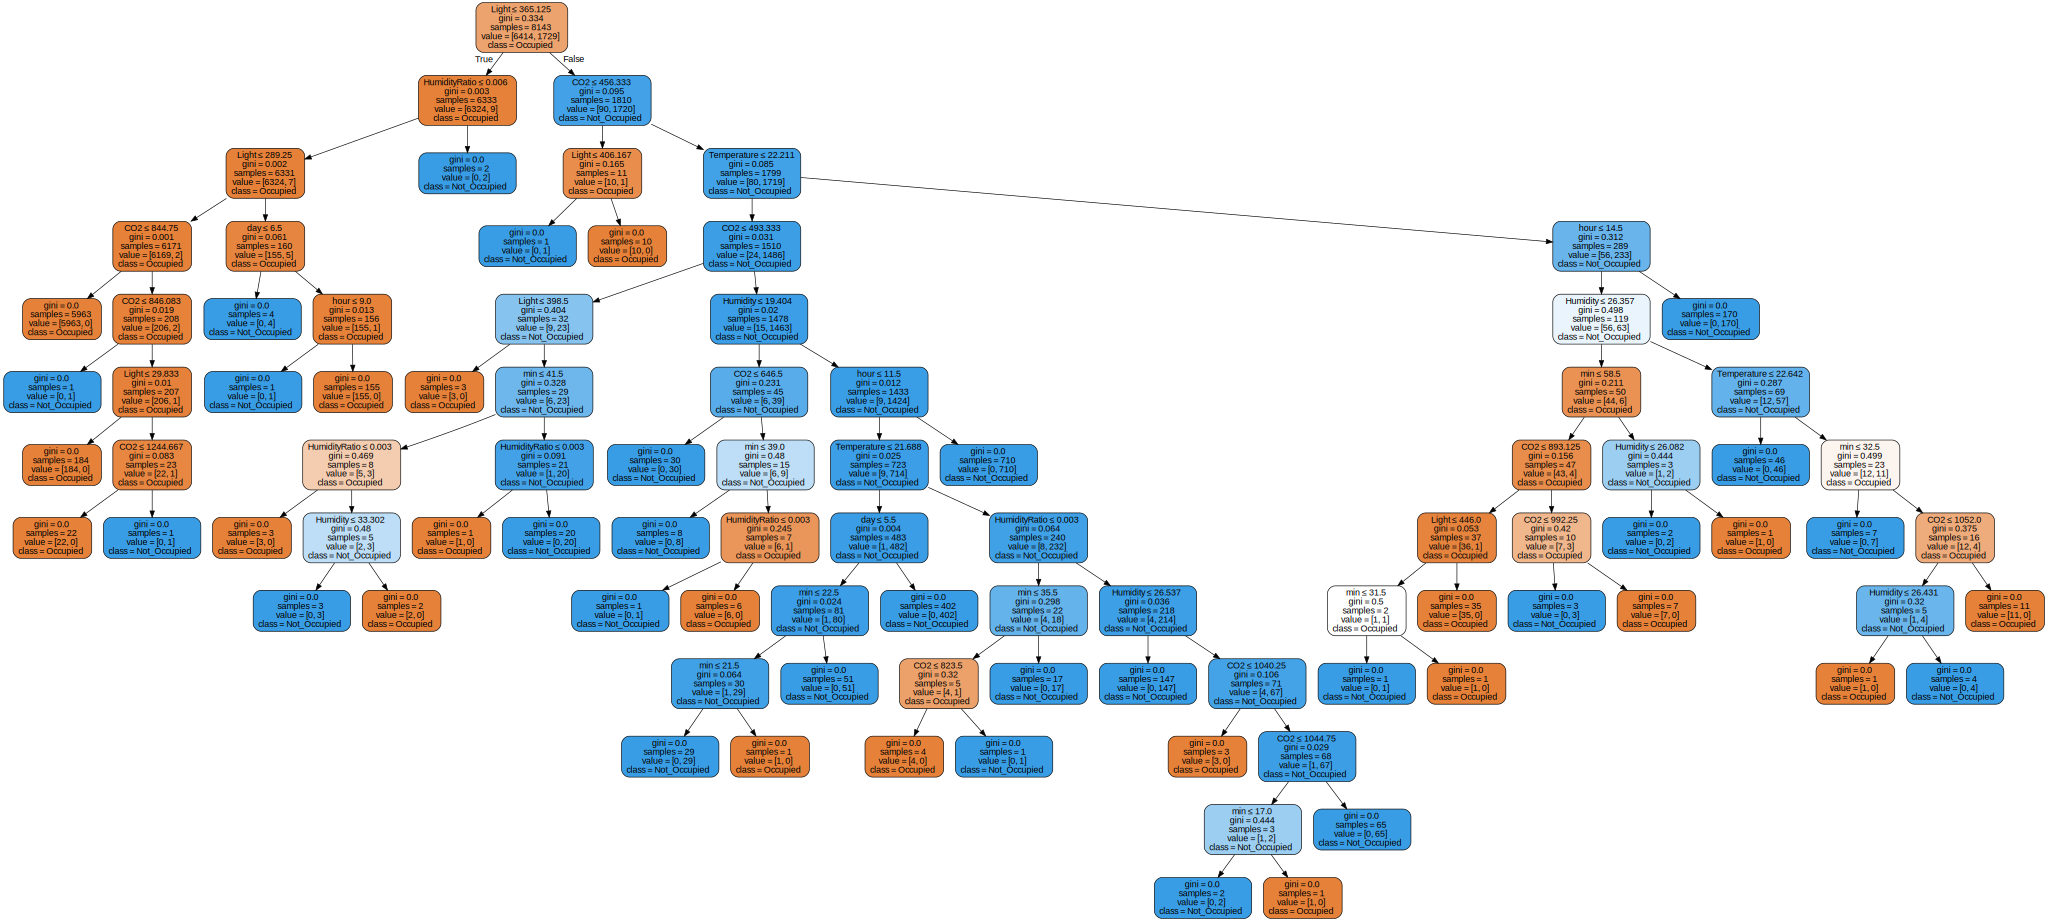

In [72]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Ocuupancy_tree") 

target_class = ['Occupied','Not_Occupied']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=headers,  
                         class_names=target_class,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph 


In [73]:
y_pred1 = clf.predict(x_test1)
rmse1 = math.sqrt(mean_squared_error(y_pred1, y_test1))
print("Root mean square error: ",rmse1)

Root mean square error:  0.2562538609968587


In [74]:
y_pred2 = clf.predict(x_test2)
rmse2 = math.sqrt(mean_squared_error(y_pred2, y_test2))
print("Root mean square error: ",rmse2)

Root mean square error:  0.1955724019309646


In [75]:
x_train.dtypes

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
day                int64
month              int64
year               int64
hour               int64
min                int64
seconds            int64
dtype: object

Question 1:

Room Occupancy Dataset consists of temperature, Humidity, Light, Carbon dioxide,HumidityRatio and date. Date is further is split into day, month, year, hour, minute and seconds. DataType of the above mentioned features are as specified above. Ground truth for this dataset was recorded by the time stamped pictures that were taken every minute. The decision tree is created using 8143 instances of training dataset. 


Question 2:

There are no missing values in the dataset. All the features except "date" from the original data set is of type float(numeric data). Date is of type object. It is further split in to day, month, year, hour and minutes column of type integer. Histogram, box plots representation of the features is as shown below.

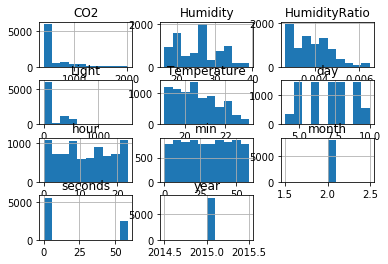

In [76]:
# Histogram representing the features of the Room Occupancy DataSet
# Training DataSet
hist = x_train.hist(bins=10)

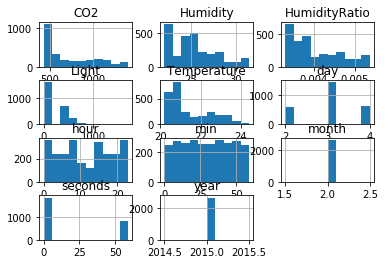

In [77]:
# test DataSet Histogram representation
hist = x_test1.hist(bins=10)

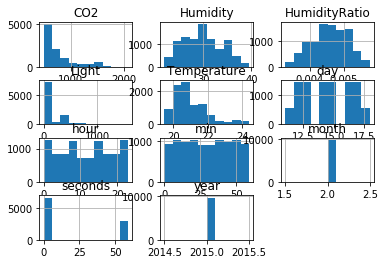

In [78]:
# test DataSet Histogram representation
hist = x_test2.hist(bins=10)

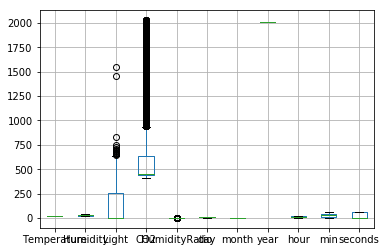

In [79]:
# Box plot representation the features of the Room Occupancy DataSet
boxplot = x_train.boxplot(column=headers)

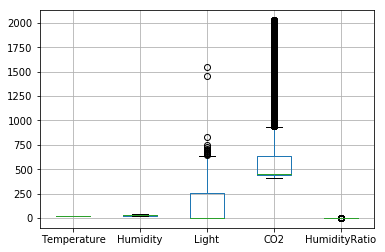

In [80]:
# Box plot representation the features of the Room Occupancy DataSet
boxplot = x_train.boxplot(column=[headers[0], headers[1], headers[2], headers[3], headers[4]])

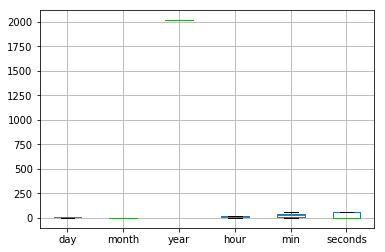

In [81]:
# Box plot representation the features of the Room Occupancy DataSet
boxplot = x_train.boxplot(column=[headers[5], headers[6], headers[7], headers[8], headers[9], headers[10]])

Question 5

For the instance created below if we try to traverse the tree from the root, we see that the light = 600 is greater than 365.125 so we traverse down towards the right node, Then we check if CO2 <= 456.333, since CO2 value of the instance is greater than 456 we traverse down towards the right node. In the same fashion we check for the nodes below for conditions CO2 <= 493.333,Humidity <= 19.404, CO2 <= 646.5, minute <= 39.0, Light <= 520.125 respectively and we split the dataset at each node accordingly until gini index value of the sample dataset is equal = 0. Traversal of graph using the mentioned path, shows that final result will be 1, which indicates that the room is occupied. It makes as rooms with considerate amount CO2, humidity and light can be occupied.

In [82]:
x_tst_instance = [[20,25,600,800,0.004700, 3, 3, 2016, 12, 30, 46]]
y_pred_ins = clf.predict(x_tst_instance)
if y_pred_ins == 1:
    print("Room is Occupied")
else:
    print("Room is not occupied")

Room is Occupied


Decision tree can overfit on data if we are dealing with large number of features. So Dimensionality reduction or feature selection plays a vital role in improving the model. We can also additionaly set max_depth to prevent overfitting by controlling the size of the tree depth.


In [104]:
x_train1 = x_train
x_test11 = x_test1
x_test22 = x_test2

# minutes and seconds of the date feature do not add much value to the model when used alone.
# we can see the root mean squre error reduces by using feature selection and by limiting
# maximum depth. 

x_train1 = x_train1.drop(columns =['min','seconds'])

x_test11 = x_test11.drop(columns =['min','seconds'])
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf.fit(x_train1, y_train)
y_pred1 = clf.predict(x_test11)
rmse1 = math.sqrt(mean_squared_error(y_pred1, y_test1))
print("Root mean square error: ",rmse1)


Root mean square error:  0.14624762469808233


In [105]:
x_test22 = x_test22.drop(columns =['min','seconds'])
y_pred2 = clf.predict(x_test22)
rmse2 = math.sqrt(mean_squared_error(y_pred2, y_test2))
print("Root mean square error: ",rmse2)

Root mean square error:  0.08288778897965618


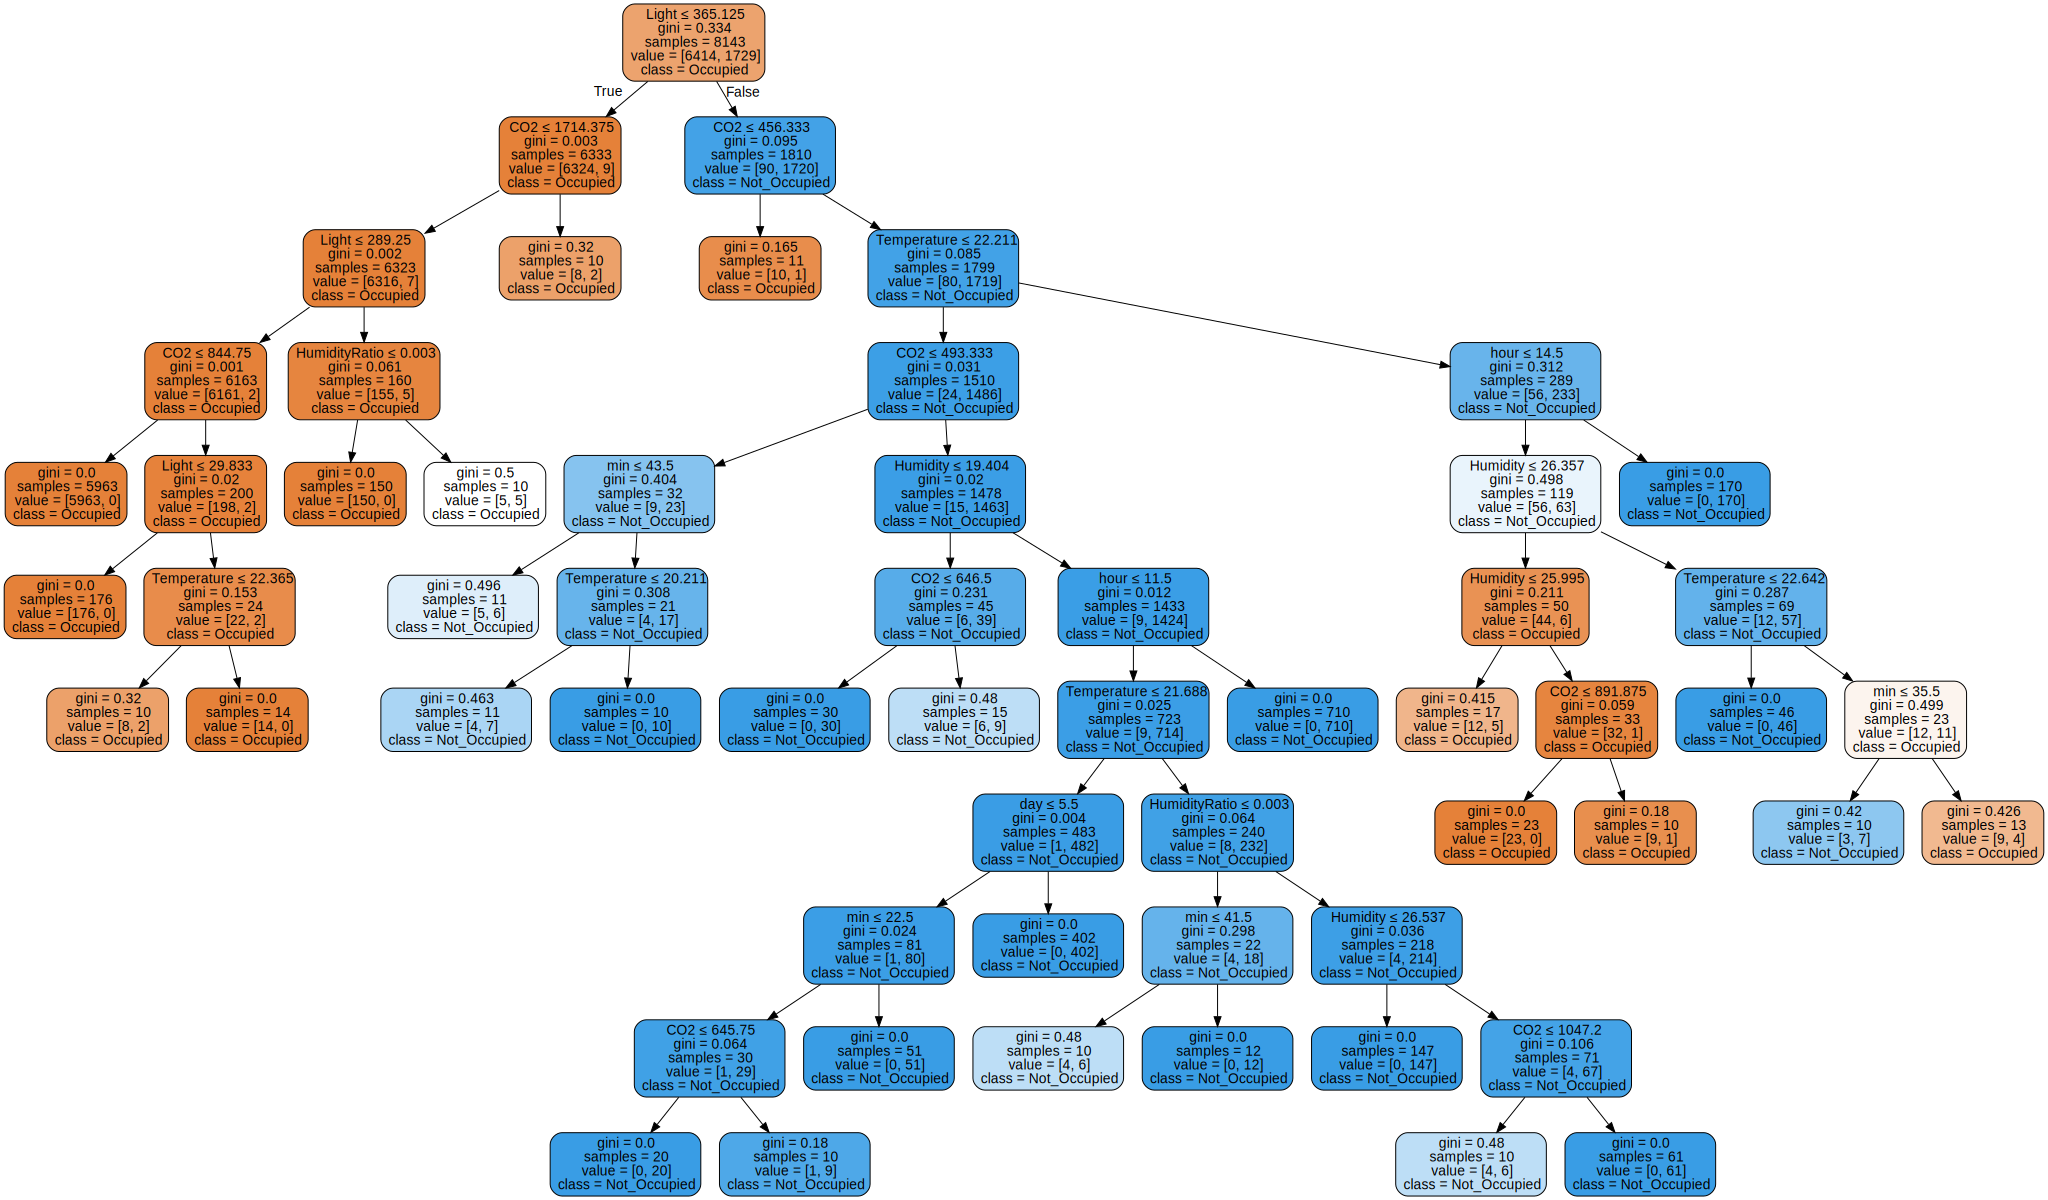

In [108]:
headers = list(x_train1.columns.values)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Ocuupancy_tree") 

target_class = ['Occupied','Not_Occupied']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=headers,  
                         class_names=target_class,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

Inorder to control the number of splits made, we can set min_samples_split and min_samples_leaf. Thia avoids low variance over-fit caused by decisions made on very small dataset.


In [125]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 60)
clf.fit(x_train1, y_train)
y_pred1 = clf.predict(x_test11)
rmse1 = math.sqrt(mean_squared_error(y_pred1, y_test1))
print("Root mean square error: ",rmse1)

Root mean square error:  0.14624762469808233


In [129]:
clf = tree.DecisionTreeClassifier(min_samples_split = 200)
clf.fit(x_train1, y_train)
y_pred1 = clf.predict(x_test11)
rmse1 = math.sqrt(mean_squared_error(y_pred1, y_test1))
print("Root mean square error: ",rmse1)

Root mean square error:  0.14879125234026064
